# ***Assignment 16 Neural Networks_Forestfire***


PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [14]:
# importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
# Import the dataset
forestfire=pd.read_csv("/content/forestfires.csv")
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forestfire.shape

(517, 31)

In [4]:
# WE can see the presence of Dummy variables in our dataset hence dropping them
data=forestfire.drop(forestfire.iloc[:, 11:30], axis=1)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [5]:
data.shape

(517, 12)

In [8]:
# CHECKING MISSING VALUES
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [11]:
# checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


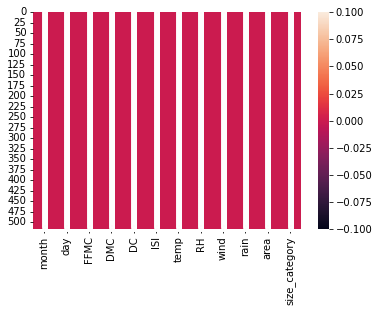

In [10]:
sns.heatmap(data.isnull(), annot = True)

In [7]:
# Descriptive Analysis
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [12]:
# data correlation
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


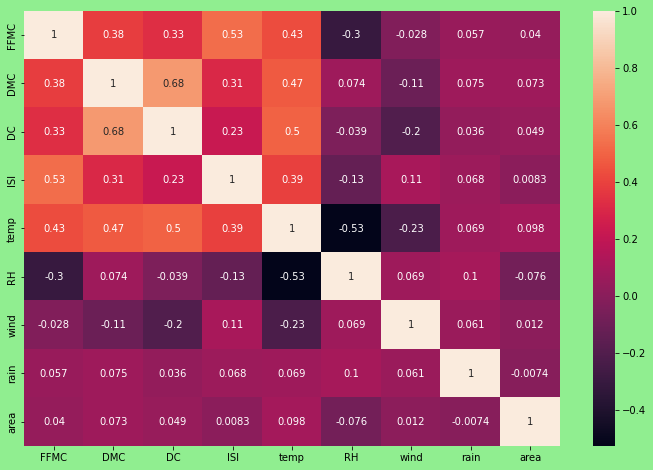

In [15]:
# visualization of data correlation
fig=plt.figure(figsize=(12,8), facecolor ="lightgreen")
sns.heatmap(data.corr(),annot=True)

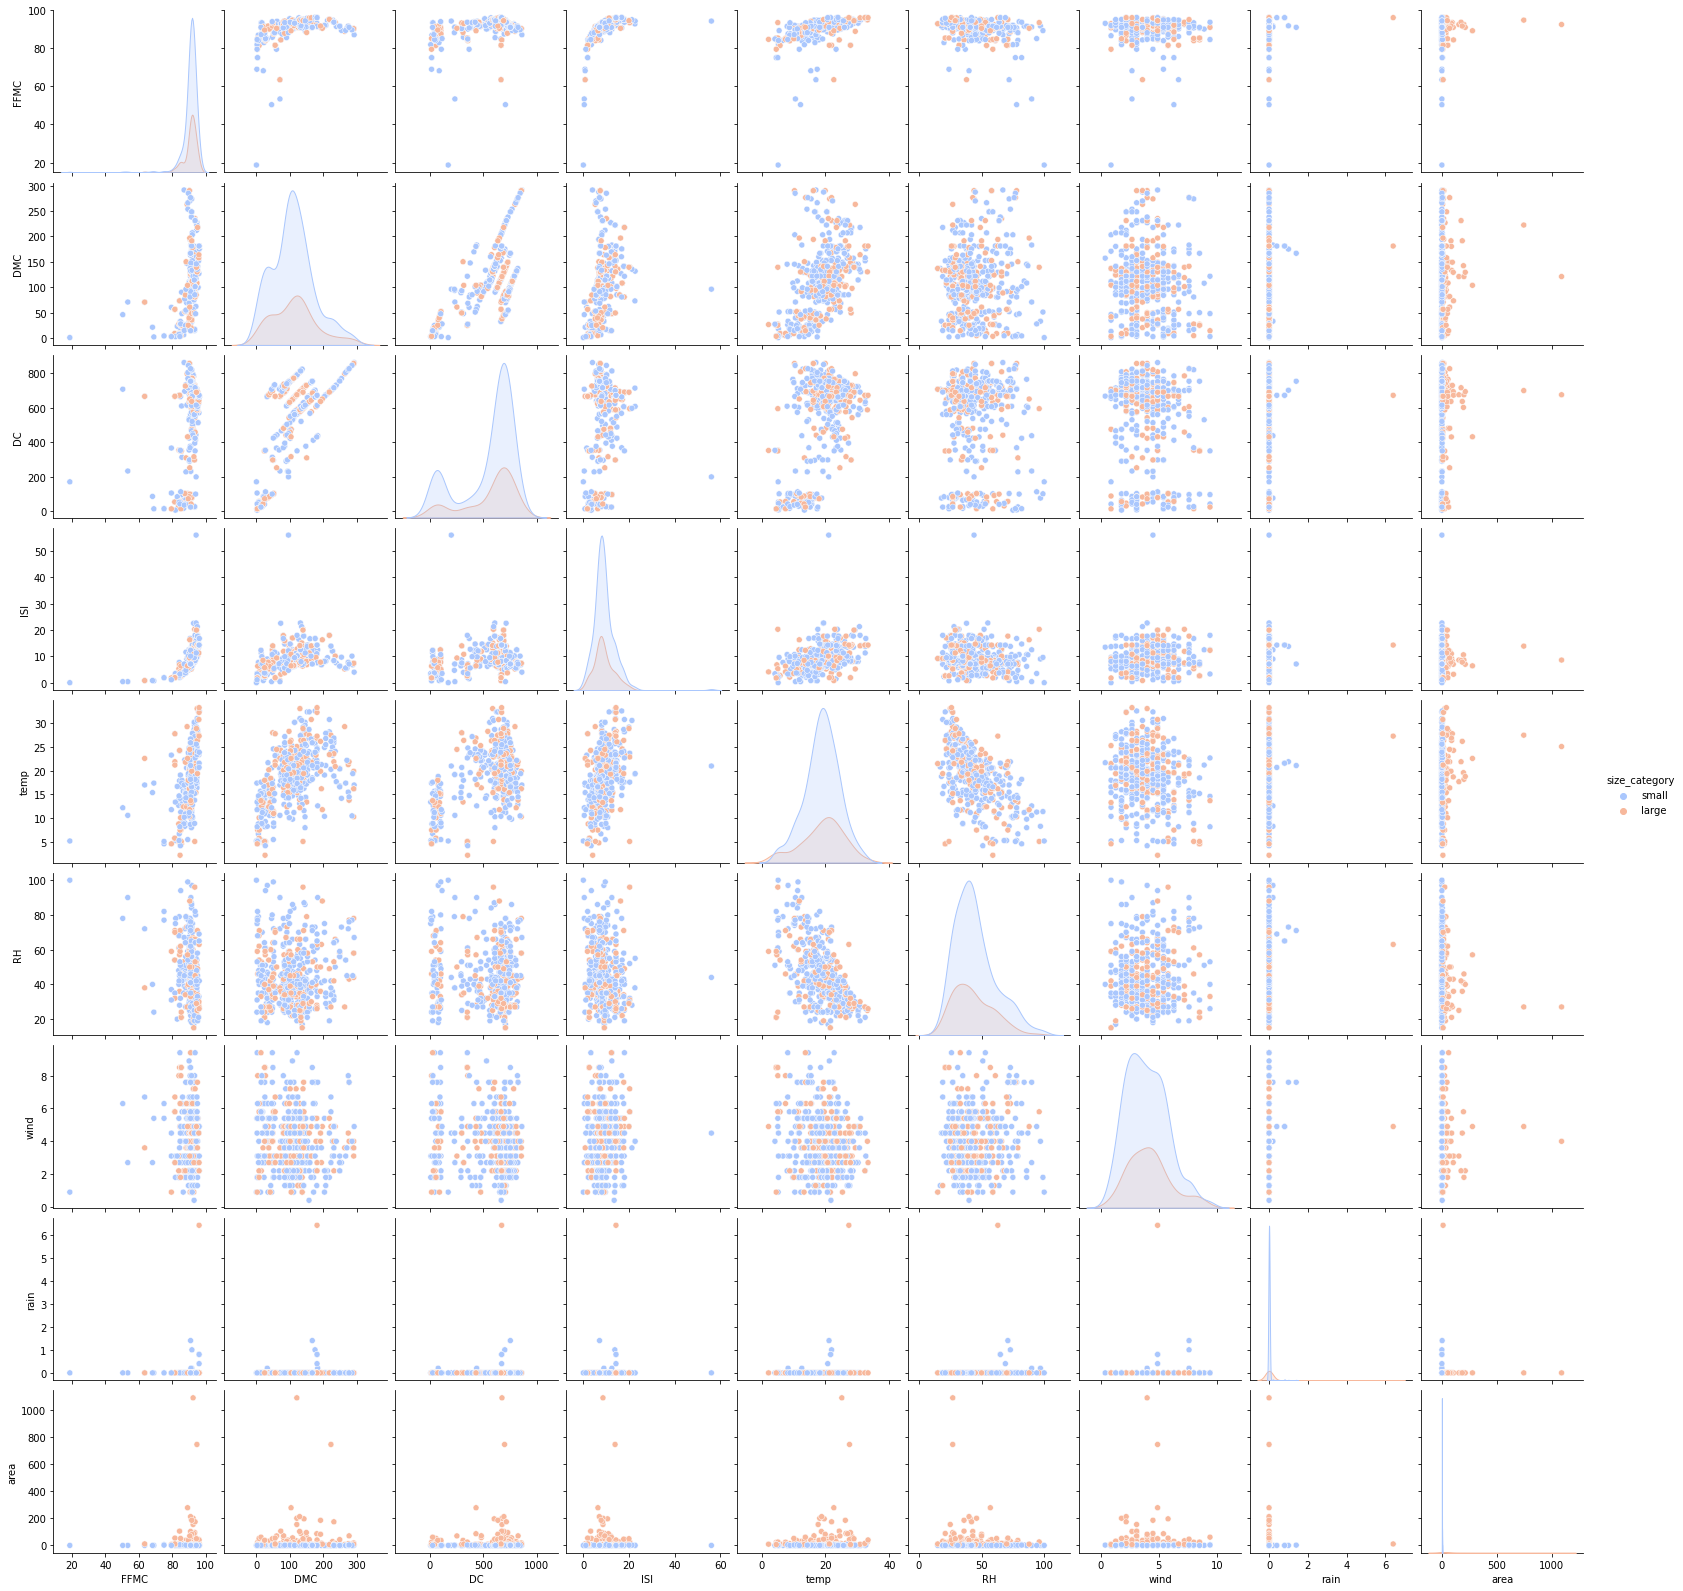

In [16]:
# Visualiztion of pairplot of all features with respect to'size_category'
sns.pairplot(data,hue='size_category',palette='coolwarm')

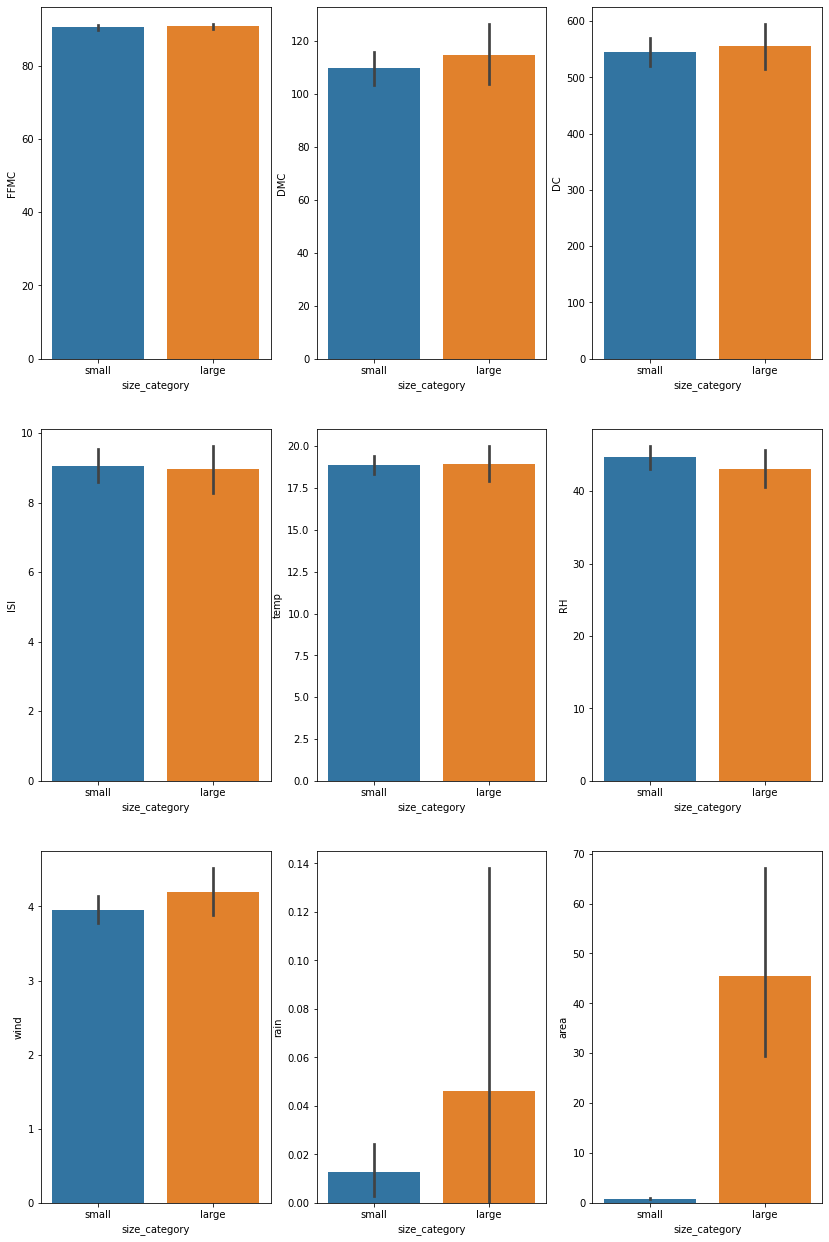

In [17]:
# Plotting for 'size_category' vs all columns 
fig, ax =plt.subplots(3,3, figsize=(14,22)) 
sns.barplot(x='size_category',y='FFMC',data=data,ax=ax[0,0])
sns.barplot(x='size_category',y='DMC',data=data,ax=ax[0,1])
sns.barplot(x='size_category',y='DC',data=data,ax=ax[0,2])
sns.barplot(x='size_category',y='ISI',data=data,ax=ax[1,0])
sns.barplot(x='size_category',y='temp',data=data,ax=ax[1,1])
sns.barplot(x='size_category',y='RH',data=data,ax=ax[1,2])
sns.barplot(x='size_category',y='wind',data=data,ax=ax[2,0])
sns.barplot(x='size_category',y='rain',data=data,ax=ax[2,1])
sns.barplot(x='size_category',y='area',data=data,ax=ax[2,2])
plt.show()

In [18]:
# Now we will standardize the data for reducing the Scaling Effect 
sc=StandardScaler()
data_norm=sc.fit_transform(data.iloc[:,2:11])
data_norm

array([[-0.80595947, -1.32332557, -1.83047676, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [-0.00810203, -1.17954077,  0.48889092, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [-0.00810203, -1.04982188,  0.56071545, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [-1.64008316, -0.84664771,  0.47476811, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.68095666,  0.54900254,  0.26938221, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [-2.02087875, -1.68591332, -1.78044169, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [19]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [20]:
data1=pd.DataFrame(data=data_norm,columns=data.columns[2:11])
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [21]:
data1['month']=data['month']
data1['day']=data['day']
data1['size_category']=data['size_category']
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,mar,fri,small
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,oct,tue,small
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,oct,sat,small
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,mar,fri,small
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,mar,sun,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,aug,sun,large
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,aug,sun,large
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,aug,sun,large
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,aug,sat,small


In [22]:
# Now converting categorical variables into dummy variables using label encoder 
le=LabelEncoder()
data1['month']=le.fit_transform(data1['month'])
data1['day']=le.fit_transform(data1['day'])
data1['size_category']=le.fit_transform(data1['size_category'])
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,7,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,10,5,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,10,2,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,7,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,1,3,0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,1,3,0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,1,3,0
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,1,2,1


In [23]:
#Splitting into X and Y variables 
X = data1.drop('size_category',axis=1)
Y = data1.size_category

In [24]:
X.head(10)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,7,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,10,5
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,10,2
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,7,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,7,3
5,0.300161,-0.399665,-0.241863,1.246598,0.570734,-0.937830,0.772325,-0.073268,-0.20202,1,3
6,0.300161,-0.343401,-0.211197,-0.114524,0.898263,-1.060516,-0.512650,-0.073268,-0.20202,1,1
7,0.155096,0.539625,0.243154,0.368455,-1.877117,2.558742,-1.015466,-0.073268,-0.20202,1,1
8,0.064430,0.291128,0.583715,-0.443828,-0.997959,1.147845,0.772325,-0.073268,-0.20202,11,5
9,0.336427,-0.357467,0.607926,-0.421874,0.674164,-0.263053,-0.009834,-0.073268,-0.20202,11,2


In [25]:
Y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: size_category, dtype: int64

In [26]:
# Now Spliiting the Data into train and test type of split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=22)

In [27]:
print("X Train (Rows,Columns)")
print(xtrain.shape)
print('\n')
print("Y Train (Rows,Columns)")
print(ytrain.shape)

X Train (Rows,Columns)
(361, 11)


Y Train (Rows,Columns)
(361,)


In [28]:
# TUNING OF HYPERPARAMETERS : STEP 1] BATCH SIZE AND EPOCHS
# Importing the Libraries Recquired 
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [29]:
# Create Model 
def create_model():
  model = Sequential()
  model.add(Dense(12,input_dim=11,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=('accuracy'))
  return model

In [30]:
# Build the Model 
model=KerasClassifier(build_fn=create_model,verbose=0)
#Define the GriDSearch Parameters 
batch_size=[10,20,40]
epochs=[10,50,100]
#Make a dictionry of the GridSearch Parameters 
param_grid=dict(batch_size=batch_size,epochs=epochs)
#build and Fit the GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.863 total time=   2.2s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.903 total time=   1.2s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.861 total time=   1.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.931 total time=   1.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.958 total time=   1.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.932 total time=   3.3s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.972 total time=   3.3s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.972 total time=   2.7s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.972 total time=   3.3s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.931 total time=   2.7s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.932 total time=   5.8s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.972 total time=   4.6s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.917 total time=   5.9s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.944 total time=   5.9s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.972 total time=  11.2s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.767 total time=   0.9s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.847 total time=   1.6s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.667 total time=   2.0s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.667 total time=   1.0s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.903 total time=   0.9s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=0.959 total time=   1.7s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.972 total time=   2.0s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.931 total time=   2.0s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.931 total time=   2.0s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.986 total time=   1.8s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=0.918 total time=   3.3s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=   3.3s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.931 total time=   3.3s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.917 total time=   3.4s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=   3.0s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.644 total time=   0.8s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.833 total time=   0.9s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.667 total time=   0.9s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.667 total time=   0.9s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................
[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.806 total time=   0.9s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.945 total time=   1.3s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.986 total time=   1.4s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.931 total time=   1.4s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=1.000 total time=   1.3s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.944 total time=   1.3s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.918 total time=   2.0s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.972 total time=   2.0s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.944 total time=   2.0s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.986 total time=   1.9s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=1.000 total time=   2.8s


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
#Summarize the Results 
print('Best :{}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best :0.9641171932220459, using {'batch_size': 40, 'epochs': 100}
0.9031582951545716,0.03788032403633476 with: {'batch_size': 10, 'epochs': 10}
0.9557458162307739,0.020181619661724944 with: {'batch_size': 10, 'epochs': 50}
0.9474124789237977,0.02208233172527717 with: {'batch_size': 10, 'epochs': 100}
0.7700913310050964,0.09482298507383942 with: {'batch_size': 20, 'epochs': 10}
0.9556697130203247,0.022237642701484015 with: {'batch_size': 20, 'epochs': 50}
0.953006100654602,0.03867899100042742 with: {'batch_size': 20, 'epochs': 100}
0.7232115745544434,0.0795016054479651 with: {'batch_size': 40, 'epochs': 10}
0.9612633109092712,0.026838921717340543 with: {'batch_size': 40, 'epochs': 50}
0.9641171932220459,0.02955854178534102 with: {'batch_size': 40, 'epochs': 100}


In [32]:
#Tuning of Hyperparameters : Step 2] Learning rate and Drop out rate 
from keras.layers import Dropout

#Defining the Model 
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(8,input_dim=11,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(5,input_dim=11,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))
  
  adam=Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=('accuracy'))
  return model

#Create the Model 
model=KerasClassifier(build_fn=create_model,batch_size=40,epochs=50,verbose=0) #Taking the best batchsize and epoch values 
#Define the Gridsearch parameters 
learning_rate=[0.001,0.1,0.01]
dropout_rate=[0.0,0.1,0.2]
#Create a dictionary of Gridsearch parameters 
param_grids=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)
#Build and fit The Grid SearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.740 total time=   1.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.792 total time=   1.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.792 total time=   1.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.667 total time=   1.3s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.806 total time=   1.4s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.945 total time=   1.4s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.944 total time=   1.3s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.917 total time=   1.3s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.958 total time=   1.3s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.944 total time=   1.3s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.945 total time=   1.4s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.958 total time=   1.3s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.931 total time=   1.3s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.944 total time=   1.4s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.958 total time=   1.4s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.699 total time=   1.4s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.764 total time=   1.4s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.806 total time=   1.3s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.694 total time=   1.3s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.861 total time=   1.4s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.918 total time=   1.3s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.903 total time=   1.4s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.944 total time=   1.4s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   1.4s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.986 total time=   2.3s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.945 total time=   1.5s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.944 total time=   1.4s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.944 total time=   1.4s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.958 total time=   1.4s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.986 total time=   1.3s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.644 total time=   1.4s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.819 total time=   1.7s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.750 total time=   1.8s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.694 total time=   1.4s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.875 total time=   1.3s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.904 total time=   1.4s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.764 total time=   1.3s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.667 total time=   1.4s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.667 total time=   1.4s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.806 total time=   1.4s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.904 total time=   1.3s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.972 total time=   1.4s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.944 total time=   1.4s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.958 total time=   1.4s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.986 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
#Summarize the Results 
print('Best :{}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best :0.9557077407836914, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7590563297271729,0.05137812521888291 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9418188571929932,0.013642691117415527 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.947374415397644,0.010357194066611262 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7647260308265686,0.06366475555140687 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9502283096313476,0.03768517614956868 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9557077407836914,0.016095223821410525 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7565448880195618,0.08317529804336068 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.761377489566803,0.0897449029059905 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.9530441284179687,0.028134471823083027 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}


In [34]:
#Tuning of Hyperparameters step 3]Activation function and Kernel Initializer 
#BEST Dropout rate = 0.0 Learning rate = 0.1 
#Defining the Model 
def create_model(activation_function,init):
  model=Sequential()
  model.add(Dense(8,input_dim=11,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.0))
  model.add(Dense(5,input_dim=11,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.0))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(lr=0.1)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=('accuracy'))
  return model

#Create the Model 
model=KerasClassifier(build_fn=create_model,batch_size=40,epochs=50,verbose=0) #Taking the best batchsize and epoch values   
#Define the GridSearch parameters 
activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']
#Create a dictionary of Gridsearch parameters 
param_grids=dict(activation_function=activation_function,init=init)
#Build and fit The Grid SearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.918 total time=   1.8s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.972 total time=   1.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.944 total time=   1.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.986 total time=   2.2s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.958 total time=   1.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.904 total time=   1.3s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.944 total time=   1.4s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.931 total time=   1.4s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.944 total time=   1.4s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.931 total time=   1.3s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.644 total time=   1.4s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.764 total time=   1.4s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.667 total time=   1.3s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.667 total time=   2.3s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.806 total time=   1.3s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=0.932 total time=   1.4s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.958 total time=   1.3s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.944 total time=   1.3s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.667 total time=   1.4s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.931 total time=   1.3s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=0.904 total time=   1.3s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.875 total time=   1.4s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.972 total time=   1.3s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   1.5s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.847 total time=   1.3s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=0.644 total time=   1.4s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.764 total time=   1.3s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.667 total time=   1.3s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.667 total time=   1.3s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.806 total time=   1.3s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=0.945 total time=   2.2s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.944 total time=   1.4s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.972 total time=   1.4s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.875 total time=   1.3s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   1.3s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=0.945 total time=   1.4s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.944 total time=   1.3s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.931 total time=   1.4s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.958 total time=   1.4s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.986 total time=   1.3s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=0.644 total time=   1.3s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.764 total time=   1.4s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.667 total time=   1.4s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.667 total time=   1.4s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.806 total time=   1.4s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=0.945 total time=   1.4s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.972 total time=   1.3s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.917 total time=   1.3s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.944 total time=   1.4s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   1.4s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.890 total time=   1.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.972 total time=   1.2s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.972 total time=   1.3s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.958 total time=   1.3s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.986 total time=   1.3s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=0.644 total time=   1.4s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.764 total time=   2.2s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.667 total time=   1.3s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.667 total time=   1.3s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.806 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [35]:
#Summarize the Results 
print('Best :{}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best :0.9558599591255188, using {'activation_function': 'linear', 'init': 'normal'}
0.9557838559150695,0.023525270888124308 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9308219194412232,0.014729799468026388 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7093226909637451,0.0635072719719287 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8863013744354248,0.11028198565173732 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9197108030319214,0.05779420853884156 with: {'activation_function': 'relu', 'init': 'normal'}
0.7093226909637451,0.0635072719719287 with: {'activation_function': 'relu', 'init': 'zero'}
0.947374415397644,0.04156491381034608 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9529299736022949,0.018774822740571535 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7093226909637451,0.0635072719719287 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9557077527046204,0.028269758947350346 with: {'activati

In [36]:
#Therefore Best Activation Function is 'linear' and Kernel Initializer is 'uniform'
#TUNING OF HYPERPARAMETERS STEP 4] NUMBER OF NEURONS 
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=11,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.0))
  model.add(Dense(neuron2,input_dim=11,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.0))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(lr=0.1)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=('accuracy'))
  return model

#Create the Model 
model=KerasClassifier(build_fn=create_model,batch_size=40,epochs=50,verbose=0) #Taking the best batchsize and epoch values  
#Define the GridSearch parameters 
neuron1=[4,8,12]
neuron2=[3,7,9]
#Create a dictionary of Gridsearch parameters 
param_grids=dict(neuron1=neuron1, neuron2=neuron2)
#Build and fit The Grid SearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=3........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=3;, score=0.945 total time=   1.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=3........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .........neuron1=4, neuron2=3;, score=0.958 total time=   1.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=3........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .........neuron1=4, neuron2=3;, score=0.944 total time=   1.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=3........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .........neuron1=4, neuron2=3;, score=0.986 total time=   1.3s
[CV 5/5; 1/9] START neuron1=4, neuron2=3........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .........neuron1=4, neuron2=3;, score=0.986 total time=   1.4s
[CV 1/5; 2/9] START neuron1=4, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .........neuron1=4, neuron2=7;, score=0.945 total time=   1.4s
[CV 2/5; 2/9] START neuron1=4, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .........neuron1=4, neuron2=7;, score=0.972 total time=   1.3s
[CV 3/5; 2/9] START neuron1=4, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .........neuron1=4, neuron2=7;, score=0.986 total time=   1.4s
[CV 4/5; 2/9] START neuron1=4, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .........neuron1=4, neuron2=7;, score=0.986 total time=   1.4s
[CV 5/5; 2/9] START neuron1=4, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .........neuron1=4, neuron2=7;, score=1.000 total time=   1.4s
[CV 1/5; 3/9] START neuron1=4, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .........neuron1=4, neuron2=9;, score=0.932 total time=   1.3s
[CV 2/5; 3/9] START neuron1=4, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .........neuron1=4, neuron2=9;, score=1.000 total time=   1.3s
[CV 3/5; 3/9] START neuron1=4, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .........neuron1=4, neuron2=9;, score=0.958 total time=   1.3s
[CV 4/5; 3/9] START neuron1=4, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .........neuron1=4, neuron2=9;, score=0.986 total time=   1.4s
[CV 5/5; 3/9] START neuron1=4, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .........neuron1=4, neuron2=9;, score=0.958 total time=   1.3s
[CV 1/5; 4/9] START neuron1=8, neuron2=3........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .........neuron1=8, neuron2=3;, score=0.986 total time=   1.4s
[CV 2/5; 4/9] START neuron1=8, neuron2=3........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .........neuron1=8, neuron2=3;, score=0.986 total time=   1.3s
[CV 3/5; 4/9] START neuron1=8, neuron2=3........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .........neuron1=8, neuron2=3;, score=0.972 total time=   1.3s
[CV 4/5; 4/9] START neuron1=8, neuron2=3........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .........neuron1=8, neuron2=3;, score=0.972 total time=   1.4s
[CV 5/5; 4/9] START neuron1=8, neuron2=3........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .........neuron1=8, neuron2=3;, score=0.972 total time=   1.4s
[CV 1/5; 5/9] START neuron1=8, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .........neuron1=8, neuron2=7;, score=0.945 total time=   1.4s
[CV 2/5; 5/9] START neuron1=8, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .........neuron1=8, neuron2=7;, score=0.958 total time=   1.3s
[CV 3/5; 5/9] START neuron1=8, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .........neuron1=8, neuron2=7;, score=0.972 total time=   1.4s
[CV 4/5; 5/9] START neuron1=8, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .........neuron1=8, neuron2=7;, score=0.986 total time=   2.2s
[CV 5/5; 5/9] START neuron1=8, neuron2=7........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .........neuron1=8, neuron2=7;, score=0.917 total time=   1.4s
[CV 1/5; 6/9] START neuron1=8, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .........neuron1=8, neuron2=9;, score=0.945 total time=   1.4s
[CV 2/5; 6/9] START neuron1=8, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .........neuron1=8, neuron2=9;, score=0.944 total time=   1.5s
[CV 3/5; 6/9] START neuron1=8, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .........neuron1=8, neuron2=9;, score=0.903 total time=   1.8s
[CV 4/5; 6/9] START neuron1=8, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .........neuron1=8, neuron2=9;, score=0.931 total time=   1.3s
[CV 5/5; 6/9] START neuron1=8, neuron2=9........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .........neuron1=8, neuron2=9;, score=0.972 total time=   1.3s
[CV 1/5; 7/9] START neuron1=12, neuron2=3.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END ........neuron1=12, neuron2=3;, score=0.973 total time=   1.3s
[CV 2/5; 7/9] START neuron1=12, neuron2=3.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END ........neuron1=12, neuron2=3;, score=0.972 total time=   1.3s
[CV 3/5; 7/9] START neuron1=12, neuron2=3.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END ........neuron1=12, neuron2=3;, score=0.917 total time=   1.4s
[CV 4/5; 7/9] START neuron1=12, neuron2=3.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END ........neuron1=12, neuron2=3;, score=0.958 total time=   1.4s
[CV 5/5; 7/9] START neuron1=12, neuron2=3.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ........neuron1=12, neuron2=3;, score=0.986 total time=   1.4s
[CV 1/5; 8/9] START neuron1=12, neuron2=7.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ........neuron1=12, neuron2=7;, score=0.945 total time=   2.0s
[CV 2/5; 8/9] START neuron1=12, neuron2=7.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ........neuron1=12, neuron2=7;, score=0.986 total time=   2.1s
[CV 3/5; 8/9] START neuron1=12, neuron2=7.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ........neuron1=12, neuron2=7;, score=0.944 total time=   2.4s
[CV 4/5; 8/9] START neuron1=12, neuron2=7.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ........neuron1=12, neuron2=7;, score=0.986 total time=   1.8s
[CV 5/5; 8/9] START neuron1=12, neuron2=7.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ........neuron1=12, neuron2=7;, score=0.986 total time=   1.3s
[CV 1/5; 9/9] START neuron1=12, neuron2=9.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ........neuron1=12, neuron2=9;, score=0.932 total time=   1.4s
[CV 2/5; 9/9] START neuron1=12, neuron2=9.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ........neuron1=12, neuron2=9;, score=0.931 total time=   1.4s
[CV 3/5; 9/9] START neuron1=12, neuron2=9.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ........neuron1=12, neuron2=9;, score=0.958 total time=   1.4s
[CV 4/5; 9/9] START neuron1=12, neuron2=9.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ........neuron1=12, neuron2=9;, score=0.972 total time=   1.3s
[CV 5/5; 9/9] START neuron1=12, neuron2=9.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ........neuron1=12, neuron2=9;, score=0.958 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
#Summarize the Results 
print('Best :{}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best :0.9779299736022949, using {'neuron1': 4, 'neuron2': 7}
0.9640410780906677,0.01868454269886805 with: {'neuron1': 4, 'neuron2': 3}
0.9779299736022949,0.018571057528146022 with: {'neuron1': 4, 'neuron2': 7}
0.9668569207191468,0.023933729295708448 with: {'neuron1': 4, 'neuron2': 9}
0.977815818786621,0.006851009113214882 with: {'neuron1': 8, 'neuron2': 3}
0.9557077527046204,0.023826404863130674 with: {'neuron1': 8, 'neuron2': 7}
0.9390410900115966,0.022606249765726245 with: {'neuron1': 8, 'neuron2': 9}
0.961187207698822,0.023931182324746905 with: {'neuron1': 12, 'neuron2': 3}
0.9695966362953186,0.020227441917739005 with: {'neuron1': 12, 'neuron2': 7}
0.950190258026123,0.016447583251424876 with: {'neuron1': 12, 'neuron2': 9}


In [38]:
#Best values of Neuron1 is 4 and for neuron 2 is 7
#Now calculating Accuracy with the help of Best parameters obtained untill now 
from sklearn.metrics import classification_report, accuracy_score
def create_model():
  model=Sequential()
  model.add(Dense(4,input_dim=11,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.0))
  model.add(Dense(7,input_dim=11,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.0))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(lr=0.1)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=('accuracy'))
  return model

#Create the Model 
model=KerasClassifier(build_fn=create_model,batch_size=40,epochs=50,verbose=0) #Taking the best batchsize and epoch values  
#Fitting the Model
model.fit(xtrain,ytrain)
#Prediction Of data using Trained Model 
y_hat=model.predict(xtest)
#Printing tthe Final Accuracy Score 
print(accuracy_score(ytest,y_hat))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.8846153846153846


# ***The Accuracy Score we obtained In this is=89.10%***